In [1]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_root_train = '/content/drive/MyDrive/2025_1_Colab/DeepLearning/Lib/midtest/mid_train_1'
data_root_test = '/content/drive/MyDrive/2025_1_Colab/DeepLearning/Lib/midtest/mid_test_1'

In [238]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32)),
    transforms.Normalize((0.1, 0.1, 0.1), (0.1, 0.1, 0.1))
])

train_set = torchvision.datasets.ImageFolder(root=data_root_train, transform=trans)
test_set = torchvision.datasets.ImageFolder(root=data_root_test, transform=trans)

In [239]:
batch_size = 256

train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

In [240]:
class CNN1(nn.Module):
  def __init__(self):
    super(CNN1, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
    )
    self.l1 = nn.Linear(in_features = 32*16*16, out_features = 50)
    self.l2 = nn.Linear(in_features = 50, out_features = 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer1(x)
    x = x.view(x.size(0), -1)
    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    return x

In [241]:
torch.cuda.manual_seed(123)
model = CNN1()
model.to(device)
lr = 0.003 # 학습률
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [242]:
history = np.zeros((0, 5))

In [243]:
from tqdm import tqdm
num_epochs = 40

In [244]:
for epochs in range(num_epochs):
  train_acc, train_loss = 0, 0
  test_acc, test_loss = 0, 0
  n_train, n_test = 0, 0

  for inputs, labels in tqdm(train_loader):
    n_train += len(labels)

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs) # 순전파
    loss = criterion(outputs, labels) # 손실값
    loss.backward() # 역전파
    optimizer.step() # 변수 업데이트

    predicted = outputs.max(axis=1)[1]

    train_loss += loss.item()
    train_acc += (predicted == labels).sum().item()

    for inputs_test, labels_test in test_loader:
      n_test += len(labels_test)
      inputs_test = inputs_test.to(device)
      labels_test = labels_test.to(device)

      outputs_test = model(inputs_test)
      loss_test = criterion(outputs_test, labels_test)
      predicted_test = outputs_test.max(axis=1)[1]
      test_loss += loss_test.item()
      test_acc += (predicted_test == labels_test).sum().item()

    train_acc = train_acc / n_train
    train_loss = train_loss / n_train
    test_acc = test_acc / n_test
    test_loss = test_loss / n_test

  item = np.array([epochs+1, train_loss, train_acc,test_loss, test_acc])
  history = np.vstack((history, item))
  print(f'Epoch {epochs+1}/{num_epochs}, loss:{train_loss:.5f}, acc:{train_acc:.2f}, test_loss:{test_loss:.5f}, test_acc{test_acc:.2f}')

100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch 1/40, loss:0.02363, acc:0.07, test_loss:0.24746, test_acc0.31


100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


Epoch 2/40, loss:0.07066, acc:0.34, test_loss:0.21344, test_acc0.34


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Epoch 3/40, loss:0.06531, acc:0.33, test_loss:0.21788, test_acc0.34


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Epoch 4/40, loss:0.06824, acc:0.33, test_loss:0.17611, test_acc0.34


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Epoch 5/40, loss:0.05332, acc:0.33, test_loss:0.08131, test_acc0.38


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


Epoch 6/40, loss:0.02396, acc:0.50, test_loss:0.06155, test_acc0.45


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


Epoch 7/40, loss:0.01805, acc:0.46, test_loss:0.04253, test_acc0.59


100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Epoch 8/40, loss:0.01142, acc:0.61, test_loss:0.04629, test_acc0.45


100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Epoch 9/40, loss:0.01141, acc:0.58, test_loss:0.05855, test_acc0.45


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


Epoch 10/40, loss:0.01498, acc:0.45, test_loss:0.06189, test_acc0.45


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


Epoch 11/40, loss:0.01601, acc:0.41, test_loss:0.04192, test_acc0.55


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Epoch 12/40, loss:0.00968, acc:0.56, test_loss:0.03258, test_acc0.59


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 13/40, loss:0.00665, acc:0.65, test_loss:0.02833, test_acc0.59


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch 14/40, loss:0.00536, acc:0.83, test_loss:0.02719, test_acc0.62


100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Epoch 15/40, loss:0.00513, acc:0.87, test_loss:0.02739, test_acc0.69


100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


Epoch 16/40, loss:0.00537, acc:0.85, test_loss:0.02821, test_acc0.66


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch 17/40, loss:0.00575, acc:0.82, test_loss:0.02903, test_acc0.59


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Epoch 18/40, loss:0.00607, acc:0.80, test_loss:0.02951, test_acc0.52


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 19/40, loss:0.00615, acc:0.80, test_loss:0.02945, test_acc0.52


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Epoch 20/40, loss:0.00595, acc:0.80, test_loss:0.02901, test_acc0.59


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


Epoch 21/40, loss:0.00555, acc:0.79, test_loss:0.02843, test_acc0.62


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Epoch 22/40, loss:0.00506, acc:0.82, test_loss:0.02780, test_acc0.66


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 23/40, loss:0.00456, acc:0.86, test_loss:0.02749, test_acc0.72


100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Epoch 24/40, loss:0.00410, acc:0.88, test_loss:0.02767, test_acc0.66


100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


Epoch 25/40, loss:0.00366, acc:0.93, test_loss:0.02837, test_acc0.62


100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Epoch 26/40, loss:0.00334, acc:0.94, test_loss:0.02900, test_acc0.62


100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Epoch 27/40, loss:0.00313, acc:0.92, test_loss:0.02804, test_acc0.66


100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Epoch 28/40, loss:0.00276, acc:0.93, test_loss:0.02645, test_acc0.69


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


Epoch 29/40, loss:0.00238, acc:0.91, test_loss:0.02532, test_acc0.66


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


Epoch 30/40, loss:0.00210, acc:0.96, test_loss:0.02483, test_acc0.66


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 31/40, loss:0.00188, acc:0.96, test_loss:0.02458, test_acc0.66


100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Epoch 32/40, loss:0.00167, acc:0.97, test_loss:0.02469, test_acc0.62


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 33/40, loss:0.00145, acc:0.97, test_loss:0.02529, test_acc0.69


100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


Epoch 34/40, loss:0.00126, acc:0.98, test_loss:0.02626, test_acc0.69


100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Epoch 35/40, loss:0.00114, acc:0.99, test_loss:0.02686, test_acc0.72


100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


Epoch 36/40, loss:0.00104, acc:0.98, test_loss:0.02626, test_acc0.72


100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Epoch 37/40, loss:0.00093, acc:0.99, test_loss:0.02467, test_acc0.72


100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


Epoch 38/40, loss:0.00081, acc:0.99, test_loss:0.02315, test_acc0.72


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch 39/40, loss:0.00073, acc:0.99, test_loss:0.02237, test_acc0.72


100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

Epoch 40/40, loss:0.00066, acc:0.98, test_loss:0.02251, test_acc0.76


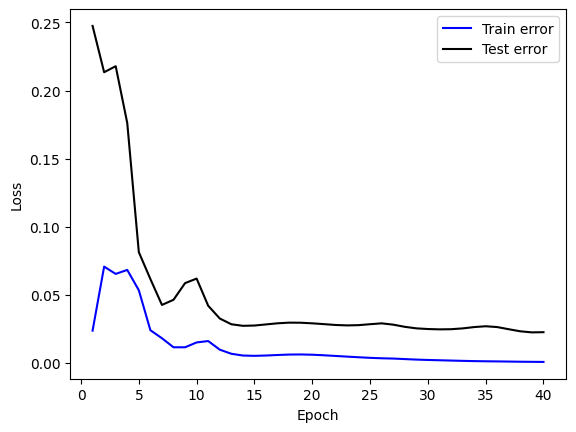

In [245]:
# 학습 곡선 출력(손실)

plt.plot(history[:, 0], history[:, 1], 'b', label='Train error')
plt.plot(history[:, 0], history[:, 3], 'k', label='Test error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

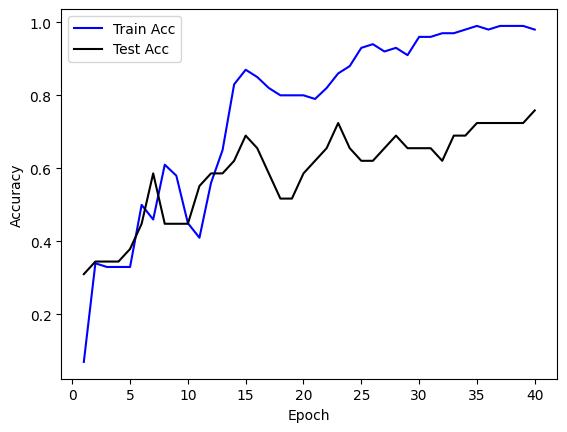

In [246]:
# 정확도
plt.plot(history[:, 0], history[:, 2], 'b', label = 'Train Acc')
plt.plot(history[:, 0], history[:, 4], 'k', label = 'Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()